In [38]:
# import and definitions
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from functools import partial
from collections import namedtuple
import numpy as np


**该文档未完成**

# 勒让德多项式

## 正交多项式
正交多项式是指一组多项式的集合，他们满足一个特性：
当他和自己求内积是得到的是一个常量
当和这一组多项式的其他成员求内积会得到0


<details>
  <summary>函数内积？</summary>
   待补充 
</details>


这个特性我们称之为**\"正交性\"**
既：

当m!=n时

$
\int_{-1}^{1} F_{m}(x)*F_{n}(x) = 0 
$

当m==n时

$
\int_{-1}^{1} F_{m}(x)*F_{n}(x) = C
$

用伪代码表示就是
```python
#当FuncM 和 FuncN是同一个函数时 sum = 一个常量，否则 sum = 0
sum = 0
for i = from -1 to 1:
    sum += FuncM(i)\*FuncN(i)/100
```


## 勒让德多项式
在各种各种的正交多项式家族中，我们比较关心一组叫做**\“关联勒让德多项式\”**(associated legendre polynomials)的多项式家族。
通常表示为$$P_{l}^{m}$$
其中 l 为大于等于0的正整数通常有称为band index，m为0 到 l的正整数,他们和其他正交多项式一样，在\[-1，1\] 区间满足**正交性**
于是根据l可以将这些多项式分成多组

$
P_{0}^{0}(x)\\
P_{1}^{0}(x),P_{1}^{1}(x)\\
P_{2}^{0}(x),P_{2}^{1}(x),P_{2}^{2}(x)\\
等等....
$


以下为关联勒让德多项式**P**的实现:


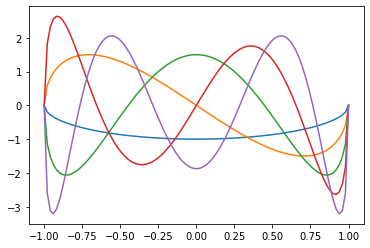

In [49]:
facttable = [math.factorial(x) for x in range(0, 40)]
# for fast factorial calculation


def factorial(x):
    return facttable[x]

# The Legendre polynomials


def P(l, m, x):
    # evaluate an Associated Legendre Polynomial P(l,m,x) at x
    #  evaluate an Associated Legendre Polynomial P(l,m,x) at x
    pmm = 1.0

    somx2 = math.sqrt((1.0 - x) * (1.0 + x))
    fact = 1.0
    for i in range(1, m+1):  # (int i=1; i <= m; i++):
        pmm *= (-fact) * somx2
        fact += 2.0

    if (l == m):
        return pmm
    pmmp1 = x * (2.0 * m + 1.0) * pmm
    if (l == m + 1):
        return pmmp1
    pll = 0.0
    for ll in range(m+2, l+1):  # (int ll=m + 2; ll <= l; ++ll):

        pll = ((2.0 * ll - 1.0) * x * pmmp1 - (ll + m - 1.0) * pmm) / (ll - m)
        pmm = pmmp1
        pmmp1 = pll

    return pll

#打印[-1,1]区间的函数图像
XAxis = np.linspace(-1,1,100)

plt.plot(XAxis, [P(1, 1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, 1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(3, 1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(4, 1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(5, 1, XAxis[x]) for x in range(0, 100)])



## 验证正交性
前面提到勒让德多项式满足**正交性**，既相同band index下的任意两个勒让德多项式的内积为常熟，不同band index的为0
我们可以用数值方法来求这个积分，也就是在\[-1,1\]均匀采样两个P()，求乘机的积分

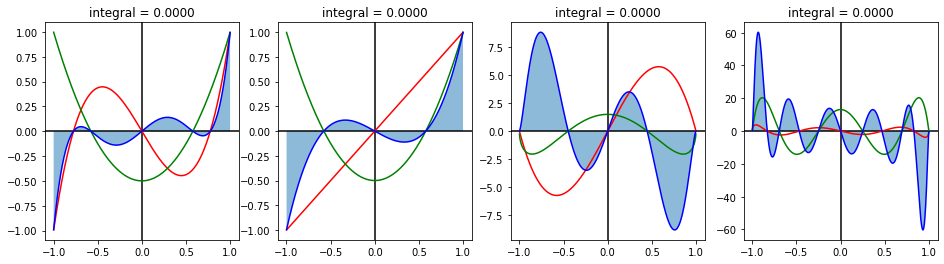

In [60]:
# verity orthogonality of P
def integrateP(l1, m1, l2, m2, fig, row, col, index):
    v1 = []
    v2 = []
    product = []
    XAxis = []
    sum = 0
    N = 1000.0
    for i in range(int(N)):
        x = ((i+0.5)/N-0.5)*2  # map [0,N) to (-1..1)
        XAxis.append(x)
        a = P(l1, m1, x)
        b = P(l2, m2, x)
        v1.append(a)
        v2.append(b)
        product.append(a*b)
        sum += (a*b)/N*2
    fig.add_subplot(row, col, index)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.plot(XAxis,v1,c="red")
    plt.plot(XAxis,v2,c="green")
    plt.fill_between(XAxis, product,  alpha=0.5)
    plt.plot(XAxis, product, c="blue")
    plt.title("integral = %.4f" % sum)


fig = plt.figure(figsize=[16, 4])
integrateP(3, 0, 2, 0, fig, 1, 4, 1)  
integrateP(1, 0, 2, 0, fig, 1, 4, 2)  
integrateP(3, 2, 3, 1, fig, 1, 4, 3)  
integrateP(6, 1, 6, 2, fig, 1, 4, 4)  


# 球谐函数
以上讨论的都是一维函数，将其扩展到二维球面就可以得到我们常说的球谐函数了，可以类比为在2维球面做傅里叶变换，并且通常来说球谐函数包含虚数部分，而这里我们值关心他的实数部分
## 参数化球面
通常球面可以参数化为 $\theta$ , $\phi$,并且可以转换为笛卡尔坐标系下的xyz

$
x = \sin(\theta)\cos(\phi)\\
y = \sin(\theta)\sin(\phi)\\
z = \cos(\theta)\\
$

## 球谐函数
球谐函数通常用符号y表示，定义如下

$
Y_{l}^{m}=\left\{\begin{matrix}
\sqrt{2}K_{l}^{m}\sin(-m\phi)P_{l}^{-m}(\cos(\theta)) &  m>0\\ 
\sqrt{2}K_{l}^{m}\cos(m\phi)P_{l}^{m}(\cos(\theta)) &  m<0\\ 
K_{l}^{0}P_{l}^{0}(\cos(\theta))  & m=0
\end{matrix}\right.
$

图形上只考虑实数形式
$
Y_{l}^{m}=\left\{\begin{matrix}
\sqrt{2}K_{l}^{m}\cos(m\phi)P_{l}^{m}(\cos(\theta)) &  m>0\\ 
\sqrt{2}K_{l}^{m}\sin(|m|\phi)P_{l}^{|m|}(\cos(\theta)) &  m<0\\ 
K_{l}^{0}P_{l}^{0}(\cos(\theta))  & m=0
\end{matrix}\right.
$

其中 **P** 就是之前的勒让德多项式，而**K**只是一个缩放系数

$
K_{l}^{m} = \sqrt(\frac{2l+1}{4\pi} \frac{(l-|m|)!}{(l+|m|)!} )
$





In [41]:

# renormalisation constant for SH function
def K(l, m):
    m = abs(m)
    twol_1 = 2*l+1
    fourPi = 4*math.pi
    fac_l_minus_m = factorial(l-abs(m))
    fac_l_plus_m = factorial(l+abs(m))
    temp = twol_1/fourPi*fac_l_minus_m/fac_l_plus_m
    return math.sqrt(temp)
# spherical harmonic funcion


def SH(l, m, theta, phi):
    sqrt2 = math.sqrt(2.0)
    if m == 0:
        return K(l, 0)*P(l, m, math.cos(theta))
    elif m > 0:
        return sqrt2*K(l, m)*math.cos(m*phi)*P(l, m, math.cos(theta))
    else:
        return sqrt2*K(l, m)*math.sin(abs(m)*phi)*P(l, abs(m), math.cos(theta))


SHSample = namedtuple('SHSample', ['x', 'y', 'z', 'theta', 'phi', 'coeffs'])
# generate uniform samples


def getSamples(N):
    s = []
    n = float(N)
    for i in range(N):
        for j in range(N):
            randX = random.random()
            randY = random.random()
            theta = 2.0 * math.acos(math.sqrt(1.0-(i+randY)/n))
            phi = (j+randX)/n*math.pi*2
            x = math.cos(phi)*math.sin(theta)
            y = math.sin(phi)*math.sin(theta)
            z = math.cos(theta)
            coeffs = []
            for l in range(0, 4):
                for m in range(-l, l+1):
                    coeffs.append(SH(l, m, theta, phi))
            s.append(SHSample(x, y, z, theta, phi, coeffs))
    return s


def visMyFunc(func, ax, a=1, b=1, c=1, fixedTheta=-1000, fixedPhi=-1000, samplesN=200, showSphere=False):
    x = []
    y = []
    z = []
    color = []
    samples = getSamples(samplesN)
    for s in samples:
        theta = s.theta

        phi = s.phi
        if fixedPhi > -1000:
            phi = fixedPhi
        if fixedTheta > -1000:
            theta = fixedTheta
        xx = math.cos(phi)*math.sin(theta)
        yy = math.sin(phi)*math.sin(theta)
        zz = math.cos(theta)
        v = func(theta, phi)
        if showSphere:
            x.append(xx)
            y.append(yy)
            z.append(zz)
        else:
            x.append(xx*abs(v))
            y.append(yy*abs(v))
            z.append(zz*abs(v))
        if v > 0:
            color.append([v,0 , 0])
        else:
            color.append([0, -v*0.5, 0])
            
    ax.scatter(x, y, z, c=color)


Text(0.5, 1.0, '1D Image of P(x) [-1,1]')

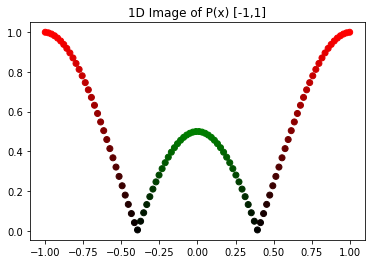

In [42]:
from matplotlib import font_manager
X = [math.cos(((x+0.5)/100.0)*math.pi) for x in range(0, 100)]
Y = [(P(2, 0, X[x])) for x in range(0, 100)]
plt.scatter(XAxis, [abs(Y[x]) for x in range(0, 100)], c=[ [Y[x],0,0] if  Y[x] >0 else [0,-Y[x],0] for x in range(0,100)])
plt.title("1D Image of P(x) [-1,1]")



勒让德函数的一维度图像（这里取了绝对值）所以绿色为负数，红色为正数，颜色越亮表示绝对值越大

下面将这个函数拓展到球面

图1将函数值映射到球面上的某条经线（Phi为固定值），图2将其扩展都整个球面单位球面，图3将函数的绝对值映射为到表面的距离（越小，离球心越近）

Text(0.5, 0.92, 'Picture3')

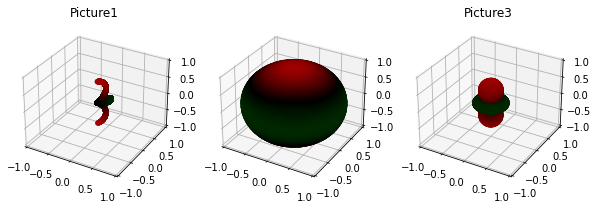

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, subplot_kw=dict(projection="3d",xlim3d=(-1,1),ylim3d=(-1,1),zlim3d=(-1,1)))
fig.set_size_inches((10,10))
visMyFunc(partial(SH, 2, 0), axes[0], showSphere=False, samplesN=100, fixedPhi=1)
visMyFunc(partial(SH, 2, 0), axes[1], showSphere=True, samplesN=100)
visMyFunc(partial(SH, 2, 0), axes[2], samplesN=100)
axes[0].set_title("Picture1")
axes[2].set_title("Picture2")
axes[2].set_title("Picture3")

Text(0.5, 0.92, 'SH(2,2)')

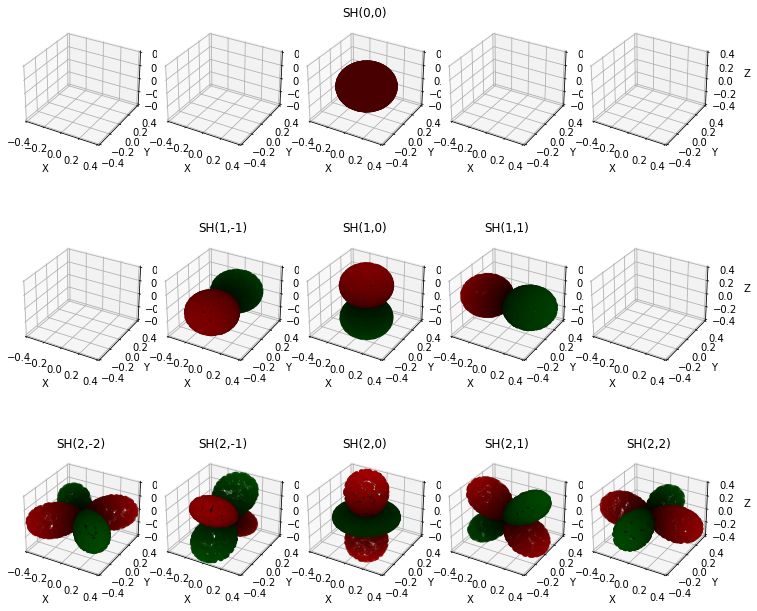

In [44]:

fig,axes = plt.subplots(   nrows = 3, ncols=5, subplot_kw=dict(projection='3d'))
fig.set_size_inches((10,10))
fig.tight_layout()
for row in axes:
    for ax in row:
        ax.grid(True)
        ax.axis(True)
        
        ax.set_xlim3d(-0.4,0.4)
        ax.set_ylim3d(-0.4,0.4)
        ax.set_zlim3d(-0.4,0.4)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        pass
        
#可视化前三阶的球谐函数图像
visMyFunc(partial(SH, 0, 0), ax=axes[0,2] ,samplesN=50)
axes[0,2].set_title("SH(0,0)")
visMyFunc(partial(SH, 1, -1), axes[1,1] ,samplesN=50 )
axes[1,1].set_title("SH(1,-1)")
visMyFunc(partial(SH, 1, 0), axes[1,2] ,samplesN=50 )
axes[1,2].set_title("SH(1,0)")
visMyFunc(partial(SH, 1, 1), axes[1,3] , samplesN=50)
axes[1,3].set_title("SH(1,1)")
visMyFunc(partial(SH, 2, -2), axes[2,0] , samplesN=50)
axes[2,0].set_title("SH(2,-2)")
visMyFunc(partial(SH, 2, -1), axes[2,1] , samplesN=50)
axes[2,1].set_title("SH(2,-1)")
visMyFunc(partial(SH, 2, 0), axes[2,2] , samplesN=50)
axes[2,2].set_title("SH(2,0)")
visMyFunc(partial(SH, 2, 1), axes[2,3] , samplesN=50)
axes[2,3].set_title("SH(2,1)")
visMyFunc(partial(SH, 2, 2), axes[2,4] , samplesN=50)
axes[2,4].set_title("SH(2,2)")


以上为前3阶的球谐基函数图像
# 投影和重建
## 投影
### 笛卡尔坐标系
设在三维空间有一个向量，(x,y,z),然后这个空间有3个正交基(1,0,0),(0,1,0),(0,0,1)，那么我们将这个向量通过点乘的方法投影到这3个正交基上，分别得到3个系数，x，y，z
然后分别将这3个系数乘以三个基并且累加就可以还原这个向量的位置 = x*(1,0,0)+y*(0,1,0)+z*(0,0,1) = (x,y,z)

<img src="Images/plt1.png">

这个概念可以推广到N维空间

### Vector Space

步骤如下:

设有一个连续的函数F(x)

<img src="Images/func1.png" >

我们可以在一定区间内对其采样，得到N个sample，[x1,x2,x3,x4.....xn]，这样一个数组也可以将其看作一个N维的向量

<img src="Images/samplefunc.png" >

设有一组基函数e(x)，他们只在采样点返回1，其余点返回0

<img src="Images/basis.png" >

对他们进行采样也能等到一组N维向量，基于定义我们得到的向量如下：

e0=[1,0,0,0,0,0,0...]

e1=[0,1,0,0,0,0,0...]

e2=[0,0,1,0,0,0,0...]

...

显然，他们两两正交

将刚才对原函数的采样得到的N维向量一次和这些基向量点乘，我们就完成了将原函数投影到一组正交基的过程

<img src="Images/projection.png" >

显然，如果我们过把N个sample逐个乘以基函数，然后将他们累加起来，就可以重建原函数

<img src="Images/rebuilt2.png" >

<img src="Images/rebuilt.png" >

对于空间中任意一点，他所受到的光照可以表示为一个球面函数，Irrdiance map，类似于一维函数的傅里叶变换，我们可以把这个球面函数投影到若干个球谐基函数，得到其在这个基函数上的系数，并且在渲染时通过系数重建该函数
首先定义一个函数MyFunc，他模拟了两个互相垂直的方向光的Irrdiance

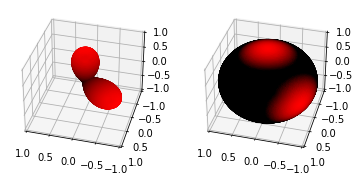

In [45]:
def myFunc(theta, phi):
    return max(0, 5*math.cos(theta)-4) + max(0, -4*math.sin(theta-math.pi)*math.cos(phi-2.5)-3)
# visualize myFunc


fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw=dict(projection="3d",xlim3d=(-1,1),ylim3d=(-1,1),zlim3d=(-1,1)))
axes[0].view_init(35,45+60)
axes[1].view_init(35,45+60)
visMyFunc(myFunc, axes[0])
visMyFunc(myFunc, axes[1],showSphere=True)


In [46]:
# projection

result = []
N = 200
result = [0]*16
samples = getSamples(N)
weight = 4*math.pi
oneOverN = 1/(N*N)
factor = weight*oneOverN

for s in samples:
    f = myFunc(s.theta, s.phi)
    for i in range(16):
        result[i] += s.coeffs[i]*f*factor

print(r"the results are almost same as calculated in page 17, http://www.cse.chalmers.se/~uffe/xjobb/Readings/GlobalIllumination/Spherical%20Harmonic%20Lighting%20-%20the%20gritty%20details.pdf")
print(["%.6f" % elem for elem in result])


the results are almost same as calculated in page 17, http://www.cse.chalmers.se/~uffe/xjobb/Readings/GlobalIllumination/Spherical%20Harmonic%20Lighting%20-%20the%20gritty%20details.pdf
['0.398826', '-0.210567', '0.286575', '0.281749', '-0.314881', '-0.000126', '0.131466', '-0.000024', '0.093093', '-0.249424', '0.000036', '0.123123', '0.303884', '-0.164941', '-0.000110', '-0.092214']


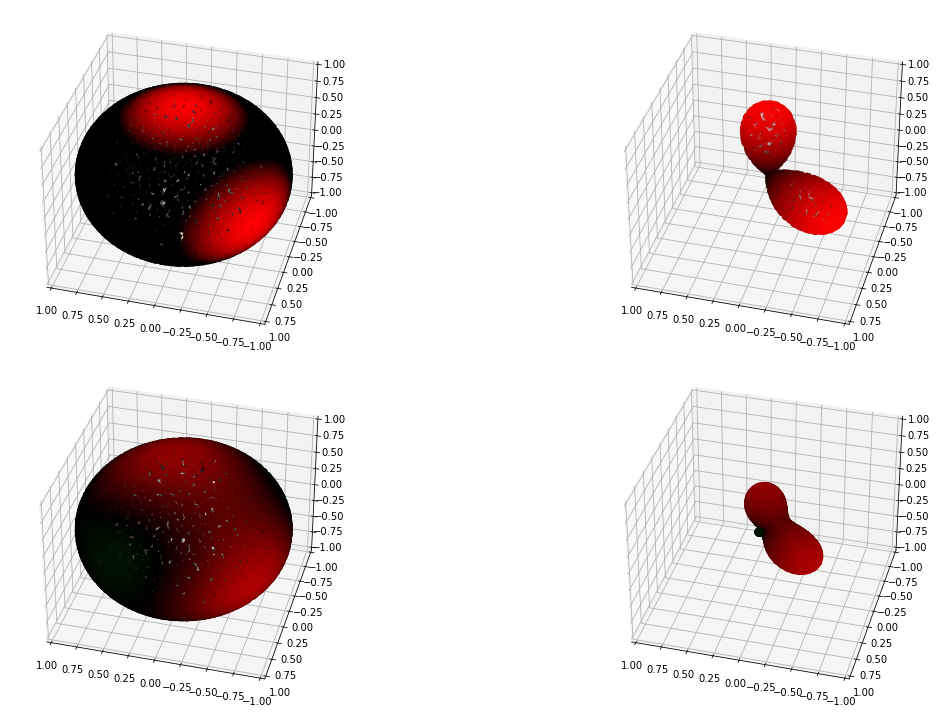

In [47]:
# rebuild
def rebuild_myFunc(coeffs, theta, phi):
    result = 0
    i = 0
    for l in range(0, 4):
        for m in range(-l, l+1):
            result += SH(l, m, theta, phi)*coeffs[i]
            i += 1
    return result


g = partial(rebuild_myFunc, result)
# show original function and compare with rebuilt from coeffs
fig,axes = plt.subplots(nrows = 2, ncols = 2,figsize=[20, 10], subplot_kw=dict(projection="3d"))
fig.tight_layout()
for row in axes:
    for ax in row:
        ax.set_xlim3d(-1,1)
        ax.set_ylim3d(-1,1)
        ax.set_zlim3d(-1,1)
        ax.view_init(35,45+60)
        
visMyFunc(myFunc, axes[0,0], samplesN=100, showSphere=True)
visMyFunc(myFunc, axes[0,1], samplesN=100)
visMyFunc(g, axes[1,0],samplesN=100,showSphere=True)
visMyFunc(g, axes[1,1],samplesN=100)
